# UBS Challange

In [2]:
import pandas as pd
import numpy as np
import os

path = os.path.join(os.path.join(os.getcwd(), os.pardir),"data")
print(path)

c:\Users\Usee\Documents\Datathon_24\datathon\src\..\data


In [3]:
file = os.path.join(path, "skylab_instagram_datathon_dataset.csv")
data = pd.read_csv(file, delimiter=";")
print(data.describe())

          followers       pictures         videos      comments         likes
count  5.792580e+05  695803.000000  684349.000000  6.953430e+05  6.959770e+05
mean   1.342432e+07     344.272540      61.244426  3.043246e+04  2.163189e+06
std    1.106975e+08    2777.396873     564.468480  2.766459e+05  1.803193e+07
min    0.000000e+00       0.000000       0.000000  0.000000e+00  0.000000e+00
25%    3.013372e+05      19.000000       2.000000  3.710000e+02  1.727700e+04
50%    1.104144e+06      44.000000       7.000000  1.435000e+03  9.318400e+04
75%    4.479325e+06     122.000000      20.000000  5.872000e+03  4.577470e+05
max    3.502565e+09  141746.000000   35905.000000  1.732046e+07  7.120711e+08


# Explore Companies

number companies:  54


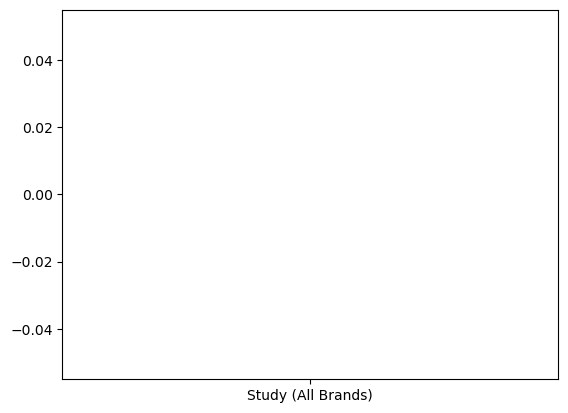

                                     entries   na
Global Luxury Analysts Interest List   29233  NaN
Beauty & Boutique                      44266  NaN
Luxury & Premium & Mainstream          64541  NaN
Apparel Retail                         69341  NaN
US Softlines Analyst Interest List    113744  NaN


In [8]:
import matplotlib.pyplot as plt

def count_entries(data: pd.DataFrame, column: str):
    cats = list(set(list(data["compset"])))
    print("number companies: ", len(cats))

    table = pd.DataFrame(columns=["entries", "na"], index=cats)
    for company in cats:
        data_company = data[data["compset"] == company]
        table.loc[company, "entries"] = len(data_company)
    table = table.sort_values(by=["entries"])
    return table

table = count_entries(data=data, column="compset")
plt.plot(table["na"])
plt.show()
print(table[-5:])

In [ ]:
def calculate_yearly_means(df, col, category_column, category_value, period: str="yearly"):
    filtered_df = df[df[category_column] == category_value]
    
    # Convert the index to datetime if it's not already
    if period == "yearly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
    elif period == "montly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.month

    yearly_means = filtered_df[col].groupby(filtered_df["time"]).mean()
    
    return yearly_means

print(calculate_yearly_means(data, "followers", "compset", "Soft Luxury", period="yearly"))

In [39]:
def average_table(df, category_column, interesting_period, period: str="yearly"):
    cols = ["pictures", "videos", "comments", "likes", "followers"] 
    cats = df[category_column].unique()
    table = pd.DataFrame(columns=cols, index=cats)
    
    if period == "yearly":
        df["time"] = pd.to_datetime(df["period_end_date"]).dt.year
    elif period == "montly":
        df["time"] = pd.to_datetime(df["period_end_date"]).dt.month

    df = df[df["time"] == interesting_period]

    for cat in cats:
        df_cat = df[df[category_column] == cat]
        for col in cols:
            table.loc[cat, cols] = np.nanmean(df_cat[col])
    
    return table

print(average_table(data, "compset", 2018))

                                             pictures           videos  \
Soft Luxury                           14917000.493759  14917000.493759   
Luxury & Premium & Mainstream          7270675.897024   7270675.897024   
US Softlines Analyst Interest List    24216149.007814  24216149.007814   
Global Luxury Analysts Interest List   9967898.598048   9967898.598048   
Coffee                                11883839.371901  11883839.371901   
Restaurants                            3436911.360772   3436911.360772   
Beverages                              2283069.426148   2283069.426148   
Sports drinks                           940118.201005    940118.201005   
Energy drinks                          6081182.353846   6081182.353846   
Fast Fashion                           9448813.022271   9448813.022271   
Omnichannel Apparel Retail            10790538.649566  10790538.649566   
Apparel Retail                         5731867.365779   5731867.365779   
US Department Store                   

C:\Users\Usee\AppData\Local\Temp\ipykernel_9540\1151104227.py:16: RuntimeWarning: Mean of empty slice
  table.loc[cat, cols] = np.nanmean(df_cat[col])


In [ ]:

def table_yearly_means(df, col, category_column, period="yearly"):
    unique_categories = df[category_column].unique()
    
    yearly_means_all = []  

    for category_value in unique_categories:
        yearly_means = calculate_yearly_means(df, col, category_column, category_value, period=period)
        yearly_means['Category'] = category_value
        
        # Append the results to the DataFrame
        yearly_means_all.append(yearly_means)

    return pd.DataFrame(yearly_means_all)

mean_table = table_yearly_means(df=data,  col="followers", category_column="compset", period="yearly")
print(mean_table)